# Fitting Models Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

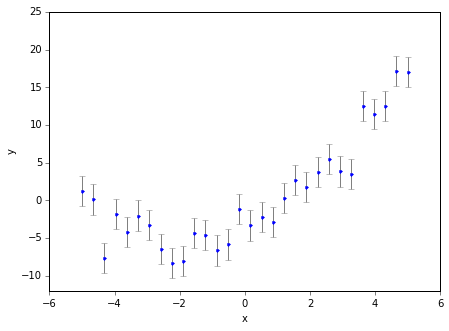

In [3]:
xdata = np.linspace(-5,5,30)
dy = 2.0

ydata = a_true*xdata**2+b_true*xdata+c_true+np.random.normal(0.0,dy,size=30)

plt.figure(figsize=(7,5))
plt.errorbar(xdata, ydata, dy, fmt='.b', ecolor='gray')
plt.tick_params(right=False,top=False,direction='out')
plt.xlabel('x')
plt.ylim(-12,25)
plt.ylabel('y');

In [4]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [5]:
def model(x,a,b,c):
    return a*x**2+b*x+c

In [6]:
theta_best, theta_cov = opt.curve_fit(model, xdata, ydata, sigma=dy)

In [7]:
print('a = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[2,2])))

a = 0.500 +/- 0.048
b = 1.854 +/- 0.129
c = -3.759 +/- 0.578


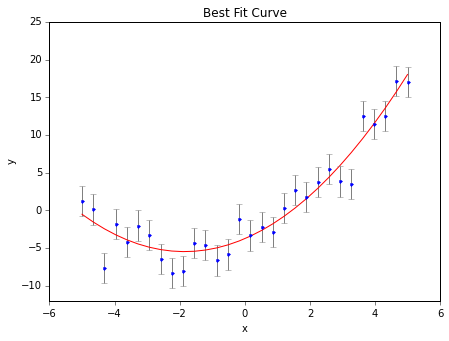

In [8]:
xfit = np.linspace(-5,5,30)
yfit = theta_best[0]*xfit**2+theta_best[1]*xfit+theta_best[2]

plt.figure(figsize=(7,5))
plt.plot(xfit, yfit,color='r')
plt.errorbar(xdata, ydata, dy, fmt='.b', ecolor='gray')
plt.tick_params(right=False,top=False,direction='out')
plt.ylim(-12,25)
plt.title('Best Fit Curve')
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors